# sst,tts(표준어 억양 ver)

In [ ]:
!pip install SpeechRecognition gtts pydub transformers torch
import speech_recognition as sr
from gtts import gTTS
from pydub import AudioSegment
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
from IPython.display import Audio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 49.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [ ]:
# 음성 파일->텍스트
def speech_to_text(audio_file_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file_path) as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_google(audio_data, language='ko-KR')
    print(text)
    return text

In [ ]:
# 모델 로드
def load_translation_pipeline(model_path, device):
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to(device)
    translation_pipeline = pipeline(
        "translation_xx_to_yy",
        model=model,
        tokenizer=tokenizer,
        device=device
    )
    return translation_pipeline

In [ ]:
# 텍스트->음성
def text_to_speech(text, output_audio_path):
    tts = gTTS(text, lang='ko')
    tts.save("temp.mp3")
    sound = AudioSegment.from_mp3("temp.mp3")
    sound.export(output_audio_path, format="wav")

In [ ]:
# full 함
def translate_audio(audio_file_path, output_audio_path, model_path, translation_token, device):
    # 음성을 텍스트로 변환
    original_text = speech_to_text(audio_file_path)

    # 번역 파이프라인 로드
    translation_pipeline = load_translation_pipeline(model_path, device)

    # 입력된 텍스트에 사용자 지정 토큰 추가 및 번역 수행
    translated_text = translation_pipeline(translation_token + " " + original_text)[0]['translation_text']

    # 번역된 텍스트를 음성으로 변환
    text_to_speech(translated_text, output_audio_path)

In [ ]:
# 모델 경로와 입력 및 출력 파일 경로 설정
model_path = '/content/drive/MyDrive/2학기/nlp 프로젝트/checkpoint_142000_0513'  # 실제 모델 경로
input_audio_path = '/content/1.wav'  # 입력 음성 파일 경로
output_audio_path = '../output_translated_audio.wav'  # 출력 음성 파일 경로

In [ ]:
jeju_token = "[제주]"
standard_token = "[표준]"

# 토큰 선택
translation_token = input("표준어 -> 제주어: 'standard', 제주어 -> 표준어: 'jeju':")
if translation_token == 'standard':
    translation_token = standard_token
elif translation_token == 'jeju':
    translation_token = jeju_token

device = 0 if torch.cuda.is_available() else -1
print(f"Using device: {device}")

# 번역 실행
translate_audio(input_audio_path, output_audio_path, model_path, translation_token, device)

# 오디오 파일 재생
Audio(output_audio_path)

표준어 -> 제주어: 'standard', 제주어 -> 표준어: 'jeju':jeju
Using device: 0


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


예 그건 한 700년 전에 이제 그 설치되었다고 합니다


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


microphone, audiofile...

# 제주 방언 억양 학습(TTS)
-> 표준음성을 텍스트로 변환하여, 이를 제주 방언 텍스트로 번역
-> 이후 제주 방언 억양을 학습한 TTS 모델로 제주 방언 텍스트를 제주억양 음성 파일로 출력

#데이터셋 설정

In [ ]:
import os
os.rename('/content/drive/MyDrive/2학기/nlp 프로젝트/voice', '/content/drive/MyDrive/2학기/nlp 프로젝트/wavs')
os.rename('/content/jss.v.1.0.tsv', '/content/jss.tsv')

metadata = pd.read_csv('/content/text_file.txt', delimiter='\t', header=None)
metadata.head()

In [ ]:
import pandas as pd

metadata = pd.read_csv('/content/jss.tsv', delimiter='\t', header=None)


print(f'총 문장 개수: {len(metadata)}개')
metadata.head()

총 문장 개수: 11개


,0,1,2,3
0,jss/0.wav,지금부터 그러면 본격적으로 우리가 도련동에 대해서 조사를 할 거라 예? 이 마을이 ...,77,9.87
1,jss/1.wav,"예, 그건 한 칠백년 전에 이제 그 설촌이 시작이 되었다고 헙니다.",37,5.00
2,jss/2.wav,예. 칠백년 전에 설촌이 뒈엇는데 이제 그루후에 이제 성씨들이 여러 성씨들이 많이 ...,74,11.61
3,jss/3.wav,예. 그러면은 칠백년부터 허는데 설촌할 때 어떤 성씨들이 헷덴 말도 이신가마씨?,44,6.39
4,jss/4.wav,그 다음 양씨. 고씨. 마 대략적으로 요런 순서가 뒘서양.,32,3.90


In [ ]:
# update path
jss_to_wavs = [v.replace('jss', 'wavs') for v in metadata[0].values]
metadata[0] = jss_to_wavs

metadata.head()

,0,1,2,3
0,wavs/0.wav,지금부터 그러면 본격적으로 우리가 도련동에 대해서 조사를 할 거라 예? 이 마을이 ...,77,9.87
1,wavs/1.wav,"예, 그건 한 칠백년 전에 이제 그 설촌이 시작이 되었다고 헙니다.",37,5.00
2,wavs/2.wav,예. 칠백년 전에 설촌이 뒈엇는데 이제 그루후에 이제 성씨들이 여러 성씨들이 많이 ...,74,11.61
3,wavs/3.wav,예. 그러면은 칠백년부터 허는데 설촌할 때 어떤 성씨들이 헷덴 말도 이신가마씨?,44,6.39
4,wavs/4.wav,그 다음 양씨. 고씨. 마 대략적으로 요런 순서가 뒘서양.,32,3.90


In [ ]:
f = open('metadata.txt', 'w')

for i in range(10):
  data = metadata.iloc[i, 0] + '|' + metadata.iloc[i, 1] + '\n'
  f.write(data)

f.close()

In [ ]:
f = open('metadata.txt', 'r')

i = 0
while i < 5:
    line = f.readline()
    i += 1
    print(line)

f.close()

wavs/0.wav|지금부터 그러면 본격적으로 우리가 도련동에 대해서 조사를 할 거라 예? 이 마을이 언제 어떻게 형성뒛덴 헌 말 알아지는 데로 ᄀᆞᆯ아줍서.

wavs/1.wav|예, 그건 한 칠백년 전에 이제 그 설촌이 시작이 되었다고 헙니다.

wavs/2.wav|예. 칠백년 전에 설촌이 뒈엇는데 이제 그루후에 이제 성씨들이 여러 성씨들이 많이 와가지고 현재는 ᄒᆞᆫ 팔십여 성씨. 경 뒈서마씀.

wavs/3.wav|예. 그러면은 칠백년부터 허는데 설촌할 때 어떤 성씨들이 헷덴 말도 이신가마씨?

wavs/4.wav|그 다음 양씨. 고씨. 마 대략적으로 요런 순서가 뒘서양.



In [ ]:
import glob as gb
wav_list = [w for w in gb.glob('/content/drive/MyDrive/2학기/nlp 프로젝트/wavs/*.wav')]

print(f'총 .wav 파일 개수: {len(wav_list)}개')

총 .wav 파일 개수: 11개


In [ ]:
import librosa

sample_rate_list = []
for i in range(10):
  path = f'/content/drive/MyDrive/2학기/nlp 프로젝트/wavs/{i}.wav'
  sample_rate_list.append(librosa.get_samplerate(path))

<ipython-input-9-66bee76bcea8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


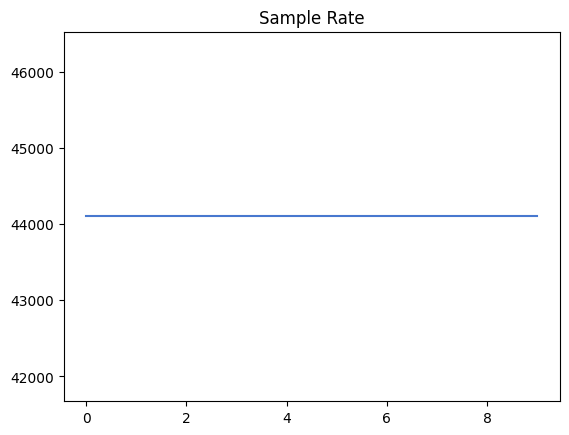

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-muted')
# sample rate of all audio file is 44100
plt.plot(sample_rate_list)
plt.title('Sample Rate');

In [ ]:
duration_list = []

for i in range(10):
  path = f'/content/drive/MyDrive/2학기/nlp 프로젝트/wavs/{i}.wav'
  duration_list.append(librosa.get_duration(filename=path))

<ipython-input-10-97814be06610>:5: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration_list.append(librosa.get_duration(filename=path))


<ipython-input-13-96a488290f6e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


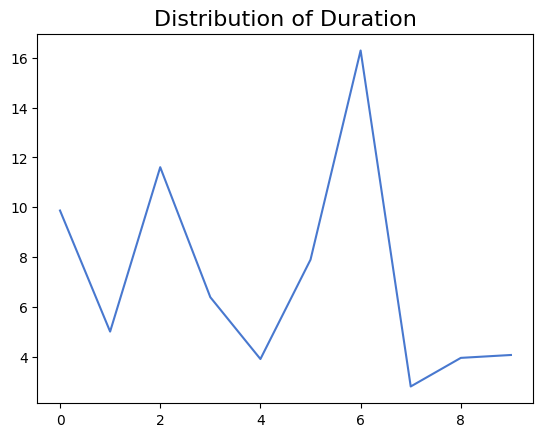

In [ ]:
plt.style.use('seaborn-muted')
plt.plot(duration_list)
plt.title('Distribution of Duration', size=16);

#glow TTS

In [ ]:
#!pip install TTS --use-deprecated=legacy-resolver
#!pip install tensorflow --use-deprecated=legacy-resolver
#!pip install jamo

In [ ]:
#!pip install korean
#!pip install konlpy
#from korean.ko_cleaner import tokenize
import os

# formatter for jss (jejueo single speaker) speech dataset
def jss_formatter(root_path, meta_file, ignored_speakers=None):
  """Normalize JSS meta data file for TTS"""
  txt_file = os.path.join(root_path, meta_file)
  items = []
  with open(txt_file, "r", encoding="utf-8") as ttf:
    for line in ttf:
      cols = line.split("|")
      wav_file = os.path.join(root_path, cols[0])
      text = cols[1].strip()
      tokens = tokenize(text)
      tokenize_text = "".join(tokens)
      items.append({"text": tokenize_text, "audio_file": wav_file, "speaker_name": "", "root_path": root_path})
  return items

In [ ]:
from trainer import Trainer, TrainerArgs
# from TTS.encoder.utils.training import init_training

from TTS.tts.configs.glow_tts_config import GlowTTSConfig
from TTS.tts.configs.shared_configs import BaseDatasetConfig, BaseAudioConfig, CharactersConfig
from TTS.tts.datasets import load_tts_samples
from TTS.tts.models.glow_tts import GlowTTS
from TTS.tts.utils.text.tokenizer import TTSTokenizer
from TTS.utils.audio import AudioProcessor

output_path = './'

# define dataset config
dataset_config = BaseDatasetConfig(dataset_name = "jss", path="/content/drive/MyDrive/2학기/nlp 프로젝트/wavs", meta_file_train="metadata.txt")

# define audio config
audio_config = BaseAudioConfig(
    sample_rate=22050,
    resample=True,
    win_length=1024,
    hop_length=256,
    num_mels=80,
    preemphasis=0.0,
    ref_level_db=20,
    log_func="np.log",
    do_trim_silence=True,
    mel_fmin=0,
    mel_fmax=None,
    spec_gain=1.0,
    signal_norm=False,
    do_amp_to_db_linear=False,
)

# define charactes config
# characters_class="TTS.tts.models.vits.VitsCharacters",
characters_config = CharactersConfig(
    pad="_",
    eos="~",
    #characters= "".join(VALID_CHARS),
    #punctuations= PUNC,
    phonemes=None,
)

# init the training config
config = GlowTTSConfig(
    batch_size=64,
    eval_batch_size=16,
    eval_split_size=0.1,
    num_loader_workers=4,
    num_eval_loader_workers=4,
    run_eval=True,
    test_delay_epochs=-1,
    epochs=1000,
    text_cleaner=None,
    use_phonemes=False,
    phoneme_language=None,
    phoneme_cache_path=os.path.join(output_path, "phoneme_cache"),
    print_step=25,
    mixed_precision=True,
    output_path=output_path,
    datasets=[dataset_config],
    audio=audio_config,
    characters=characters_config,
)


# init the audio processor
ap = AudioProcessor.init_from_config(config)

# init the tokenizer
tokenizer, config = TTSTokenizer.init_from_config(config)

# load training samples
train_samples, eval_samples = load_tts_samples(dataset_config, eval_split=True, eval_split_size=config.eval_split_size, formatter=jss_formatter)

# init the model
model = GlowTTS(config, ap, tokenizer, speaker_manager=None)


# init the trainer and 🚀
trainer = Trainer(TrainerArgs(), config, output_path, model=model, train_samples=train_samples, eval_samples=eval_samples)

trainer.fit()

#hifigan

In [ ]:
import os

from trainer import Trainer, TrainerArgs

from TTS.utils.audio import AudioProcessor
from TTS.vocoder.configs import HifiganConfig
from TTS.tts.configs.shared_configs import BaseAudioConfig
from TTS.vocoder.datasets.preprocess import load_wav_data
from TTS.vocoder.models.gan import GAN

output_path = './'

# define audio config
audio_config = BaseAudioConfig(
    sample_rate=22050,
    resample=True,
)

config = HifiganConfig(
    batch_size=64,
    eval_batch_size=16,
    num_loader_workers=4,
    num_eval_loader_workers=4,
    run_eval=True,
    test_delay_epochs=5,
    epochs=10,
    seq_len=8192,
    pad_short=2000,
    use_noise_augment=True,
    print_step=10,
    print_eval=False,
    mixed_precision=False,
    lr_gen=1e-4,
    lr_disc=1e-4,
    data_path="jss",
    output_path=output_path,
    audio=audio_config,
)

# init the audio processor
ap = AudioProcessor.init_from_config(config)

# load training samples
eval_samples, train_samples = load_wav_data(config.data_path, config.eval_split_size)

# init the model
model = GAN(config, ap)

# init the trainer and 🚀
trainer = Trainer(
    TrainerArgs(), config, output_path, model=model, train_samples=train_samples, eval_samples=eval_samples
)

trainer.fit()

테스트

In [ ]:
import os
import torch
from TTS.tts.models.glow_tts import GlowTTS
from TTS.vocoder.models.gan import GAN
from TTS.utils.audio import AudioProcessor
from TTS.tts.utils.text.tokenizer import TTSTokenizer
from TTS.tts.configs.glow_tts_config import GlowTTSConfig
from TTS.vocoder.configs import HifiganConfig

# 모델 경로 설정
glow_tts_checkpoint = "glow_tts_checkpoint.pth.tar"
hifi_gan_checkpoint = "hifi_gan_checkpoint.pth.tar"
config_path = "config.json"

# 오디오 프로세서 초기화
ap = AudioProcessor.init_from_config(config_path)

# Glow-TTS 모델 로드
glow_tts = GlowTTS.init_from_checkpoint(glow_tts_checkpoint)

# HiFi-GAN 모델 로드
hifi_gan = GAN.init_from_checkpoint(hifi_gan_checkpoint)

# 토크나이저 초기화
tokenizer = TTSTokenizer.init_from_config(config_path)


In [ ]:
def text_to_speech(text, glow_tts, hifi_gan, ap, tokenizer):
    # 텍스트 토크나이징
    tokens = tokenizer.text_to_ids(text)

    # 스펙트로그램 생성
    _, mel_spec, _ = glow_tts.generate(tokens)

    # 오디오 파형 생성
    audio = hifi_gan.inference(mel_spec)

    # 오디오 출력
    ap.save_wav(audio, "output.wav")

    return audio

# 텍스트 입력
text = "안녕하수꽈"

# 음성 생성
audio = text_to_speech(text, glow_tts, hifi_gan, ap, tokenizer)


In [ ]:
import IPython.display as ipd

# 생성된 오디오 파일 재생
ipd.Audio("output.wav")
